In [1]:
import pandas as pd
import glob
import seaborn as sns

## funtion for pipe 

In [2]:

def get_only_uniprot_accession(df, colname):
    
    colname_out = colname + '_uniprot_accession'
    
    df[colname_out] = df[colname].str.split('-', expand=True)[1]
    
    return df

def get_only_geneID_accession(df, colname):
    
    colname_out = colname + '_geneID'
    
    df[colname_out] = df[colname].apply(lambda x: x[:x.find('_unrelaxed_rank_')])
    
    return df


def calc_coverage(df, which_one ,start, end, lenght):
    
    col_name = 'COV_' + which_one
    
    df[col_name] = (df.loc[: , end] - df.loc[: , start]) / df.loc[: , lenght]
    
    df[col_name] = df[col_name].round(2)
    
    return df

## concatenating all tsv data frames 

In [3]:
list_of_df = []
for file in glob.glob('../../../../results/reciprocal_best_hit_TSV/cluster_representer_locally_modelated_proteins_vs_UP000*'):
    
    df = pd.read_csv(file, sep='\t', names=['query','target','alnlen','fident', 'evalue', 'qstart','qend', 'qlen','tstart','tend','tlen','aligmentinfo'])
    
    #info from file name
    info = file.split('_')[-4:-1]
    df['proteome'] = info[0]
    df['spp'] = info[-1]
    
    #appending_list
    list_of_df.append(df)
    #print(file)

In [4]:
df = pd.concat(list_of_df)

In [5]:
len(list_of_df)

48

## saco de los subject los kinetoplastidos 

In [6]:
df = df.loc[~df['spp'].isin(['TRYCC','TRYB2','LEIIN']),:]

In [7]:
df.spp.unique()

array(['HUMAN', 'HELPY', 'STRER', 'STAA8', 'PSEAE', 'MYCTU', 'PLAF7',
       'ECOLI', 'CAMJE', 'MYCUL', '9EURO2', 'DROME', 'CAEEL', 'KLEPH',
       'SALTY', 'SPOS1', 'NEIG1', 'YEAST', 'WUCBA', 'STRR6', 'DICDI',
       'SCHMA', 'RAT', 'HAEIN', 'AJECG', 'DRAME', 'CANAL', 'ENTFC',
       '9EURO1', 'ARATH', 'DANRE', 'MAIZE', '9PEZI1', 'ONCVO', 'SHIDS',
       'TRITR', 'BRUMA', 'MOUSE', 'METJA', 'ORYSJ', 'SOYBN', 'MYCLE',
       'PARBA', 'SCHPO', '9NOCA1'], dtype=object)

In [8]:
df

,query,target,alnlen,fident,evalue,qstart,qend,qlen,tstart,tend,tlen,aligmentinfo,proteome,spp
0,LMARLEM2494_240022200_unrelaxed_rank_002_alpha...,AF-O75474-F1-model_v4.cif.gz,43,0.184,7.093000e-03,14,221,238,0,232,233,22M3I15M19D46M1I21M1D10M2D17M7I22M14D44M,UP000005640,HUMAN
1,TcCL_Unassigned05388_unrelaxed_rank_004_alphaf...,AF-Q3LI76-F1-model_v4.cif.gz,23,0.148,1.508000e+00,0,145,146,0,134,137,24M2D82M13I27M,UP000005640,HUMAN
2,TcSYL_0079890_unrelaxed_rank_001_alphafold2_pt...,AF-Q9H322-F1-model_v4.cif.gz,32,0.204,6.100000e-02,3,143,145,0,138,139,54M7I26M1I43M6D10M,UP000005640,HUMAN
3,TcSYL_0055300_unrelaxed_rank_001_alphafold2_pt...,AF-A0A1B0GVY4-F1-model_v4.cif.gz,50,0.150,2.356000e-01,1,53,76,9,61,71,53M,UP000005640,HUMAN
4,TcSYL_0045590_unrelaxed_rank_004_alphafold2_pt...,AF-O76070-F1-model_v4.pdb.gz,50,0.175,1.351000e-01,1,84,96,43,126,127,38M6I8M7D19M1I12M,UP000005640,HUMAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,TcSYL_0061790_unrelaxed_rank_003_alphafold2_pt...,AF-K0EXE5-F1-model_v4.cif.gz,36,0.185,4.425000e-01,11,78,168,1,61,335,10M1D16M6I6M1I7M2I6M1D14M,UP000006304,9NOCA1
1014,TcSYL_0151030_unrelaxed_rank_002_alphafold2_pt...,AF-K0EIC3-F1-model_v4.cif.gz,26,0.104,1.191000e+00,152,194,200,52,99,114,39M5D4M,UP000006304,9NOCA1
1015,DQ04_02331030_unrelaxed_rank_002_alphafold2_pt...,AF-K0ETT9-F1-model_v4.cif.gz,41,0.098,3.575000e-01,67,287,401,1,121,124,5M1I9M2I22M12I11M9I14M19I6M16I4M6I9M8I5M9I5M14...,UP000006304,9NOCA1
1016,TcCL_ESM09720_unrelaxed_rank_001_alphafold2_pt...,AF-K0ELU5-F1-model_v4.pdb.gz,93,0.171,5.167000e-07,5,290,291,8,291,324,33M2D24M9I5M28I45M2D39M1D13M5D27M2D20M9D21M2D1...,UP000006304,9NOCA1


## df inspection and cheking
* some target are duplicated because they have a .pdb and .cif file. -> remove .cif if there is allready a .pdb #rbh return both so is not a problem for the analysis.
* some ortho groups from single members have the same structure assigned by tritrypDB. So we will find them duplicated.

In [9]:
df = (df
 .pipe(get_only_geneID_accession, 'query')
 .pipe(get_only_uniprot_accession, 'target')
 .pipe(calc_coverage, 'query', 'qstart', 'qend','qlen')
 .pipe(calc_coverage, 'target', 'tstart', 'tend','tlen'))

print(df.shape)

df = df.drop_duplicates(['query_geneID', 'target_uniprot_accession'])

print(df.shape)

(56623, 18)
(42707, 18)


In [10]:

#dataframe with GO annotation informattion
df_gene_information = pd.read_csv('../../../tmp/GenesByOrthologPattern_Summary.txt',
                                  sep='\t',
                                  low_memory=False)

ortho_g_count = df_gene_information.groupby('Ortholog Group').size().to_frame()
ortho_g_count = ortho_g_count[ortho_g_count[0] > 10]

## Amount of cluster with rbh result 

In [12]:
df_ogup = pd.read_csv('../../../report/ortholog_groups_x_sequence_clustering_x_UNIPROT_locally_modelated_prot.tsv', sep='\t')

In [13]:
df_ogup = df_ogup[~df_ogup.pLDDT_mean.isna()]

In [30]:
print(df_ogup.shape)

(3690, 4)


In [32]:
df_ogup.Ortholog_Group.nunique()

3690

In [15]:
print('Total amount of cluster to annotate:')
print(df_ogup.Ortholog_Group.nunique())

Total amount of cluster to annotate:
3690


In [26]:
#merging df 
df_merged = df_ogup.merge(df, left_on='geneID', right_on='query_geneID', how='inner')

In [28]:
df_merged

,Ortholog_Group,geneID,pLDDT_mean,file_name,query,target,alnlen,fident,evalue,qstart,...,tstart,tend,tlen,aligmentinfo,proteome,spp,query_geneID,target_uniprot_accession,COV_query,COV_target
0,OG6_158083,CFAC1_290005300,96.0,CFAC1_290005300_unrelaxed_rank_001_alphafold2_...,CFAC1_290005300_unrelaxed_rank_001_alphafold2_...,AF-Q8IUF8-F1-model_v4.pdb.gz,132,0.116,0.000004,22,...,68,262,465,7M4I5M1I10M7D11M18D4M1D7M11D3M3I22M1D5M1I9M1I1...,UP000005640,HUMAN,CFAC1_290005300,Q8IUF8,0.74,0.42
1,OG6_158083,CFAC1_290005300,96.0,CFAC1_290005300_unrelaxed_rank_001_alphafold2_...,CFAC1_290005300_unrelaxed_rank_001_alphafold2_...,AF-O24884-F1-model_v4.pdb.gz,142,0.138,0.000004,67,...,362,457,470,8M9I31M1I8M22I15M8I8M1I16M1D9M,UP000000429,HELPY,CFAC1_290005300,O24884,0.57,0.20
2,OG6_158083,CFAC1_290005300,96.0,CFAC1_290005300_unrelaxed_rank_001_alphafold2_...,CFAC1_290005300_unrelaxed_rank_001_alphafold2_...,AF-A0A0K0EQE9-F1-model_v4.cif.gz,108,0.105,0.000030,66,...,25,188,195,4M1D6M11D6M2D5M1D35M1I9M3I4M10I3M4I29M1I17M8D2...,UP000035681,STRER,CFAC1_290005300,A0A0K0EQE9,0.68,0.84
3,OG6_158083,CFAC1_290005300,96.0,CFAC1_290005300_unrelaxed_rank_001_alphafold2_...,CFAC1_290005300_unrelaxed_rank_001_alphafold2_...,AF-Q2G0C9-F1-model_v4.cif.gz,131,0.135,0.000015,29,...,1,132,157,6M6I5M5I6M8I13M2I25M1I19M5I7M12I6M4D6M6I35M,UP000008816,STAA8,CFAC1_290005300,Q2G0C9,0.73,0.83
4,OG6_158083,CFAC1_290005300,96.0,CFAC1_290005300_unrelaxed_rank_001_alphafold2_...,CFAC1_290005300_unrelaxed_rank_001_alphafold2_...,AF-Q9HTB7-F1-model_v4.cif.gz,130,0.130,0.000006,67,...,374,478,479,8M9I33M3I9M20I12M8I8M1I16M2D17M,UP000002438,PSEAE,CFAC1_290005300,Q9HTB7,0.60,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22438,OG6r16_147994,TcSYL_0056970,23.0,TcSYL_0056970_unrelaxed_rank_003_alphafold2_pt...,TcSYL_0056970_unrelaxed_rank_003_alphafold2_pt...,AF-A0A1C1CRP0-F1-model_v4.pdb.gz,18,0.170,0.322700,0,...,152,437,536,26M1D17M11D9M5I37M3I9M3I15M4D6M1I6M7I16M6I28M1...,UP000094526,9EURO1,TcSYL_0056970,A0A1C1CRP0,0.95,0.53
22439,OG6r16_147994,TcSYL_0056970,23.0,TcSYL_0056970_unrelaxed_rank_003_alphafold2_pt...,TcSYL_0056970_unrelaxed_rank_003_alphafold2_pt...,AF-Q6PC01-F1-model_v4.cif.gz,10,0.161,13.120000,155,...,59,132,133,11M5I8M7I3M2I35M17I17M,UP000000437,DANRE,TcSYL_0056970,Q6PC01,0.35,0.55
22440,OG6r16_147994,TcSYL_0056970,23.0,TcSYL_0056970_unrelaxed_rank_003_alphafold2_pt...,TcSYL_0056970_unrelaxed_rank_003_alphafold2_pt...,AF-A0A2R8PYC5-F1-model_v4.pdb.gz,10,0.145,3.553000,0,...,142,446,449,17M1I26M3I41M2I11M9I13M5I17M4I38M15D10M1D9M6D1...,UP000000437,DANRE,TcSYL_0056970,A0A2R8PYC5,0.94,0.68
22441,OG6r16_147994,TcSYL_0056970,23.0,TcSYL_0056970_unrelaxed_rank_003_alphafold2_pt...,TcSYL_0056970_unrelaxed_rank_003_alphafold2_pt...,AF-K7TN76-F1-model_v4.cif.gz,27,0.122,0.848800,73,...,37,137,140,9M4I8M9I30M3D37M8D6M,UP000007305,MAIZE,TcSYL_0056970,K7TN76,0.34,0.71


In [33]:
print('Total amount of cluster with hit in rbh approach:')
print(df_merged.Ortholog_Group.nunique())

Total amount of cluster with hit in rbh approach:
3090


3090


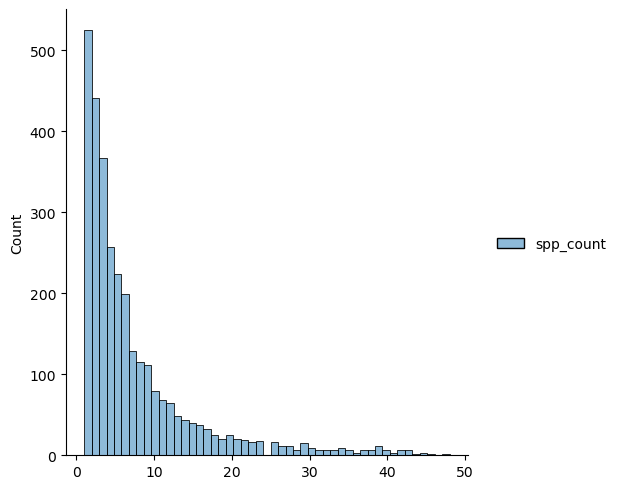

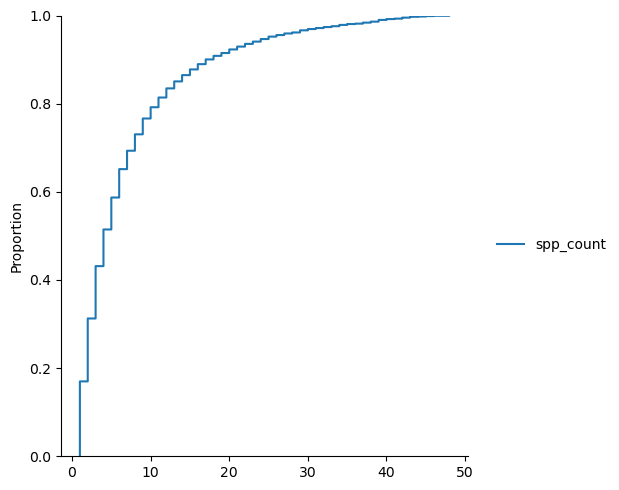

In [34]:
data = df_merged.groupby('Ortholog_Group')['spp'].count().to_frame()
data.columns = ['spp_count']
#data = data[data >= 10]
#data = data[data <= 10]

print(len(data.index))

sns.displot(data=data)
sns.displot(data=data,kind='ecdf')

In [35]:
## adding count info 

df_merged = df_merged.merge(data, left_on='Ortholog_Group', right_index=True  ,how='left')

# Plotting some usefull info 

<Axes: xlabel='pLDDT_mean', ylabel='fident'>

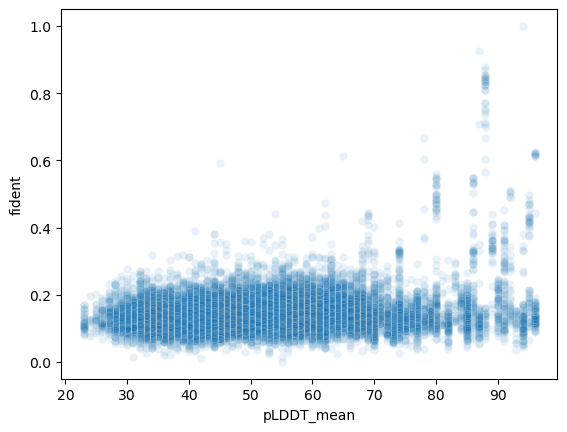

In [36]:
sns.scatterplot(data = df_merged, #.sample(frac=.1), 
                x='pLDDT_mean', 
                y='fident', 
                #marker ='.',
               alpha=0.1)

<Axes: xlabel='pLDDT_mean', ylabel='spp_count'>

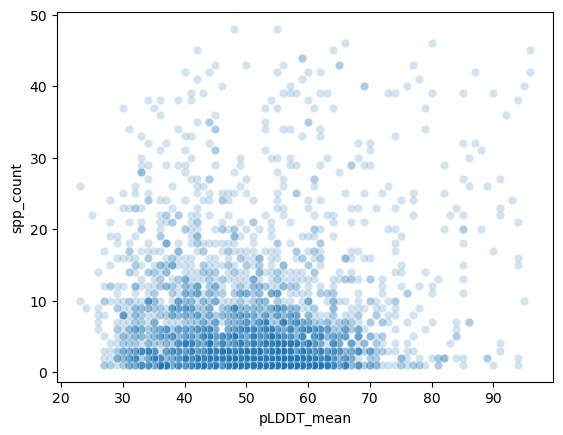

In [37]:
sns.scatterplot(data = df_merged.drop_duplicates(subset=['Ortholog_Group']), #.sample(frac=.1), 
                x='pLDDT_mean', 
                y='spp_count', 
                #marker ='.',
               alpha=0.2)

In [41]:
df_merged[
    (df_merged['COV_query'] > .7) &
    (df_merged['COV_target'] > .7) &
    (df_merged['evalue'] < 1e-3)].sort_values('evalue')#.Ortholog_Group.nunique()

,Ortholog_Group,geneID,pLDDT_mean,file_name,query,target,alnlen,fident,evalue,qstart,...,tend,tlen,aligmentinfo,proteome,spp,query_geneID,target_uniprot_accession,COV_query,COV_target,spp_count
150,OG6_137595,TcIL3000.A.H_000180200,94.0,TcIL3000.A.H_000180200_unrelaxed_rank_001_alph...,TcIL3000.A.H_000180200_unrelaxed_rank_001_alph...,AF-A0A0H3H688-F1-model_v4.cif.gz,2235,1.000,7.237000e-56,0,...,285,286,286M,UP000007841,KLEPH,TcIL3000.A.H_000180200,A0A0H3H688,1.00,1.00,38
106,OG6_102918,BSAL_80270,95.0,BSAL_80270_unrelaxed_rank_004_alphafold2_ptm_m...,BSAL_80270_unrelaxed_rank_004_alphafold2_ptm_m...,AF-P25093-F1-model_v4.pdb.gz,1932,0.481,2.217000e-51,1,...,405,419,48M3I8M4D219M42D1M7D77M,UP000002494,RAT,BSAL_80270,P25093,0.99,0.97,40
87,OG6_102918,BSAL_80270,95.0,BSAL_80270_unrelaxed_rank_004_alphafold2_ptm_m...,BSAL_80270_unrelaxed_rank_004_alphafold2_ptm_m...,AF-P16930-F1-model_v4.pdb.gz,1918,0.473,8.051000e-51,1,...,405,419,49M2I8M3D219M42D1M7D77M,UP000005640,HUMAN,BSAL_80270,P16930,0.99,0.97,40
119,OG6_102918,BSAL_80270,95.0,BSAL_80270_unrelaxed_rank_004_alphafold2_ptm_m...,BSAL_80270_unrelaxed_rank_004_alphafold2_ptm_m...,AF-P35505-F1-model_v4.pdb.gz,1909,0.471,1.566000e-50,1,...,405,419,48M3I6M4D221M42D1M7D77M,UP000000589,MOUSE,BSAL_80270,P35505,0.99,0.97,40
99,OG6_102918,BSAL_80270,95.0,BSAL_80270_unrelaxed_rank_004_alphafold2_ptm_m...,BSAL_80270_unrelaxed_rank_004_alphafold2_ptm_m...,AF-Q94272-F1-model_v4.pdb.gz,1847,0.436,4.530000e-49,0,...,406,418,50M2I6M3D150M1D72M49D48M1I28M,UP000001940,CAEEL,BSAL_80270,Q94272,0.99,0.97,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,OG6_553029,Baya_033_0580,68.0,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,AF-A0A0K0EJ70-F1-model_v4.cif.gz,90,0.093,9.838000e-04,11,...,572,573,8M5I15M3I7M1D20M1I9M3I23M1D4M9I22M10D19M3D15M1...,UP000035681,STRER,Baya_033_0580,A0A0K0EJ70,0.95,0.98,23
1429,OG6r16_148298,TcCL_ESM04848,77.0,TcCL_ESM04848_unrelaxed_rank_001_alphafold2_pt...,TcCL_ESM04848_unrelaxed_rank_001_alphafold2_pt...,AF-C0NWG8-F1-model_v4.cif.gz,81,0.107,9.886000e-04,7,...,348,359,28M6I5M10I21M11I52M3I23M1I17M4I42M51D99M,UP000001631,AJECG,TcCL_ESM04848,C0NWG8,0.97,0.94,22
12561,OG6r16_180341,LSCM4_06212,48.0,LSCM4_06212_unrelaxed_rank_004_alphafold2_ptm_...,LSCM4_06212_unrelaxed_rank_004_alphafold2_ptm_...,AF-P09016-F1-model_v4.pdb.gz,52,0.127,9.968000e-04,0,...,245,255,49M7I16M11I29M7D37M4D14M3D27M1D23M,UP000005640,HUMAN,LSCM4_06212,P09016,1.00,0.82,14
10375,OG6r16_148505,TcCL_NonESM09182,52.0,TcCL_NonESM09182_unrelaxed_rank_002_alphafold2...,TcCL_NonESM09182_unrelaxed_rank_002_alphafold2...,AF-A0A5K4EJS1-F1-model_v4.pdb.gz,75,0.140,9.975000e-04,1,...,120,162,48M6D67M,UP000008854,SCHMA,TcCL_NonESM09182,A0A5K4EJS1,0.95,0.74,14


In [42]:
df_merged[(df_merged['query_geneID'] ==('Baya_033_0580'))] #[df_merged['Ortholog_Group'] == 'OG6r16_102156'].sort_values('fident')

,Ortholog_Group,geneID,pLDDT_mean,file_name,query,target,alnlen,fident,evalue,qstart,...,tend,tlen,aligmentinfo,proteome,spp,query_geneID,target_uniprot_accession,COV_query,COV_target,spp_count
2552,OG6_553029,Baya_033_0580,68.0,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,AF-O25075-F1-model_v4.cif.gz,54,0.132,9.186000e-02,2,...,302,329,37M3D34M3I14M1D2M1I20M1D16M1D4M14D22M3I2M6I9M6...,UP000000429,HELPY,Baya_033_0580,O25075,0.38,0.70,23
2553,OG6_553029,Baya_033_0580,68.0,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,AF-A0A0K0EJ70-F1-model_v4.cif.gz,90,0.093,9.838000e-04,11,...,572,573,8M5I15M3I7M1D20M1I9M3I23M1D4M9I22M10D19M3D15M1...,UP000035681,STRER,Baya_033_0580,A0A0K0EJ70,0.95,0.98,23
2554,OG6_553029,Baya_033_0580,68.0,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,AF-Q8IHV6-F1-model_v4.cif.gz,88,0.080,3.391000e-05,2,...,931,1788,7M6D9M4D8M3D15M2D11M16D11M2I19M7I9M3D5M5D8M2D1...,UP000001450,PLAF7,Baya_033_0580,Q8IHV6,0.99,0.38,23
2555,OG6_553029,Baya_033_0580,68.0,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,AF-Q8IGJ0-F1-model_v4.cif.gz,122,0.113,3.785000e-04,2,...,738,834,10M16D29M3D2M7I14M6D5M1I13M1D10M2D10M1D3M2I12M...,UP000000803,DROME,Baya_033_0580,Q8IGJ0,0.98,0.79,23
2556,OG6_553029,Baya_033_0580,68.0,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,AF-A0A0H3GWA2-F1-model_v4.pdb.gz,47,0.122,1.241000e-02,2,...,484,485,21M9D17M3D3M4D22M12I7M1I4M4I13M12I6M3D5M11I14M...,UP000007841,KLEPH,Baya_033_0580,A0A0H3GWA2,0.91,0.97,23
2557,OG6_553029,Baya_033_0580,68.0,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,AF-Q8ZPZ8-F1-model_v4.pdb.gz,81,0.115,3.189000e-04,6,...,441,444,19M4I10M8I5M1D2M2D11M5D13M1I26M4I5M19I13M7D6M8...,UP000001014,SALTY,Baya_033_0580,Q8ZPZ8,0.81,0.92,23
2558,OG6_553029,Baya_033_0580,68.0,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,AF-Q8DP32-F1-model_v4.pdb.gz,30,0.108,5.326000e-02,1,...,534,540,16M15D8M8D19M4D7M9D16M1I22M1I11M4D23M8D20M10D1...,UP000000586,STRR6,Baya_033_0580,Q8DP32,0.89,0.98,23
2559,OG6_553029,Baya_033_0580,68.0,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,AF-D3ZKQ3-F1-model_v4.cif.gz,117,0.113,2.081000e-05,0,...,588,596,39M1I9M2D9M4D8M5D21M4I12M6I29M3I13M4D3M11D13M4...,UP000002494,RAT,Baya_033_0580,D3ZKQ3,0.89,0.99,23
2560,OG6_553029,Baya_033_0580,68.0,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,AF-C0NK47-F1-model_v4.cif.gz,111,0.113,4.951000e-06,4,...,647,648,16M1D11M7D10M9I15M12I8M1D4M2I10M1D11M10D20M2I2...,UP000001631,AJECG,Baya_033_0580,C0NK47,0.95,0.97,23
2561,OG6_553029,Baya_033_0580,68.0,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,Baya_033_0580_unrelaxed_rank_001_alphafold2_pt...,AF-A0A1D8PFW4-F1-model_v4.cif.gz,111,0.107,1.937000e-04,7,...,1086,1089,39M1I7M11D10M12I9M6I2M2I5M15I20M8D3M20D17M6D10...,UP000000559,CANAL,Baya_033_0580,A0A1D8PFW4,0.99,0.62,23


In [ ]:
df_merged[df_merged['Ortholog_Group'] == 'OG6_100266'].sort_values('fident')